#Importing library and the data frame.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

#DataFrame description




> ### Income
> ***

Monthly income from main job for individuals aged 10 years or older.

> ### Age
> ***

Age of the resident on the reference date in years.

> ### State
> ***

|Code|Description|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Gender
> ***

|Code|Description|
|---|---|
|0|Male|
|1|Female|

> ### Years of Study
> ***

|Code|Description|
|---|---|
|1|No instruction and less than 1 year|
|2|1 Year|
|3|2 Years|
|4|3 Years|
|5|4 Years|
|6|5 Years|
|7|6 Years|
|8|7 Years|
|9|8 Years|
|10|9 Years|
|11|10 Years|
|12|11 Years|
|13|12 Years|
|14|13 Years|
|15|14 Years|
|16|15 Years or more|
|17|Not determined|
||Not applicable|

> ### Ethnicity
> ***

|Code|Description|
|---|---|
|0|Indigenous|
|2|White|
|4|Black|
|6|Asian|
|8|Brown|
|9|No declaration|

# Comparison between: Men and Women


In [ ]:
df.columns

Index(['State', 'Gender', 'Age', 'Ethnicity', 'Years of Study', 'Income'], dtype='object')

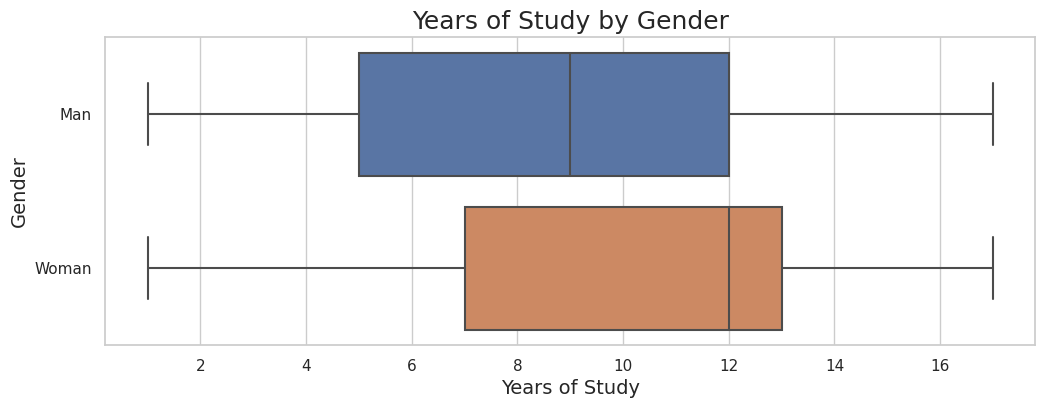

In [ ]:
ax = sns.boxplot(x='Years of Study',y = 'Gender', data = df,
                 orient ='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Years of Study by Gender', fontsize = 18)
ax.set_xlabel('Years of Study',fontsize = 14)
ax.set_ylabel('Gender',fontsize = 14)
plt.yticks([0,1],['Man','Woman'])
#sns.despine(left=True, bottom=True)

ax;

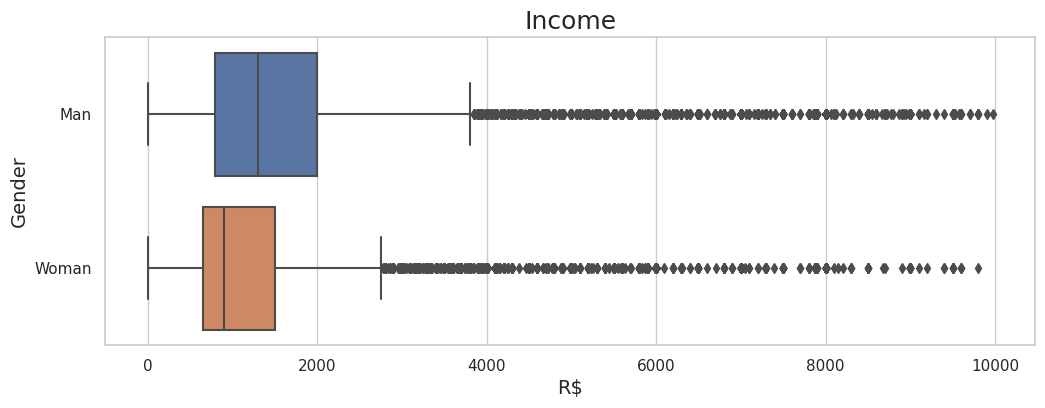

In [ ]:
ax = sns.boxplot(x=df.query('Income < 10000').Income,y = 'Gender', data = df,
                 orient ='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Income', fontsize = 18)
ax.set_xlabel('R$',fontsize = 14)
ax.set_ylabel('Gender',fontsize = 14)
plt.yticks([0,1],['Man','Woman'])
#sns.despine(left=True, bottom=True)

ax;

In [ ]:
m = df.query('Gender==0')['Income'].mean().round(2)
w = df.query('Gender==1')['Income'].mean().round(2)

In [ ]:
print(f'Average salary for men -> $ {m}\nAverage salary for women -> $ {w}')

Average salary for men -> $ 2192.44
Average salary for women -> $ 1566.85


By using these two Boxplots, we identified two factors, revealing a gender inequality in Brazil. In the first Boxplot, we observed that women study more than men (while men study an average of 8 years, women study 11 years).In the second Boxplot, we see the inequality, as despite women studying more, they earn less. With a little help from the query, we obtained the overall average salary without the constraint used in the Boxplot, which was salaries up to $10,000.

In these queries, we observed that the average salary for men is $2,199.44.

While for women, it's $1,566.85.

***

Ao utilizar esses dois Boxplots, identificamos dois fatores que revelam desigualdade de gênero no Brasil. No primeiro Boxplot, observamos que as mulheres estudam mais do que os homens (enquanto os homens estudam uma média de 8 anos, as mulheres estudam 11 anos). No segundo Boxplot, percebemos a desigualdade, pois mesmo as mulheres estudando mais, elas recebem menos. Com um pequeno auxílio da query, obtivemos a média salarial geral sem a restrição utilizada no Boxplot, que considerava salários até R$10.000.

Nessas consultas, notamos que o salário médio dos homens é de R$2.192,44.

Enquanto o das mulheres é de R$1.566,85.

# Comparison between: Ethnic

In [ ]:
normal_Income = df.groupby(by='Ethnicity')['Income'].mean()
normal_Income= pd.DataFrame(normal_Income)

In [ ]:
normal_Income.reset_index(inplace=True)

In [ ]:
normal_Income.Ethnicity.replace({0:'Indigenous',2:'White',4:'Black',6:'Asian',8:'Brown'}, inplace=True)

In [ ]:
normal_Income.Income = normal_Income['Income'].round(2)

In [ ]:
normal_Income

,Ethnicity,Income
0,Indigenous,1472.89
1,White,2679.02
2,Black,1442.29
3,Asian,4182.92
4,Brown,1513.60


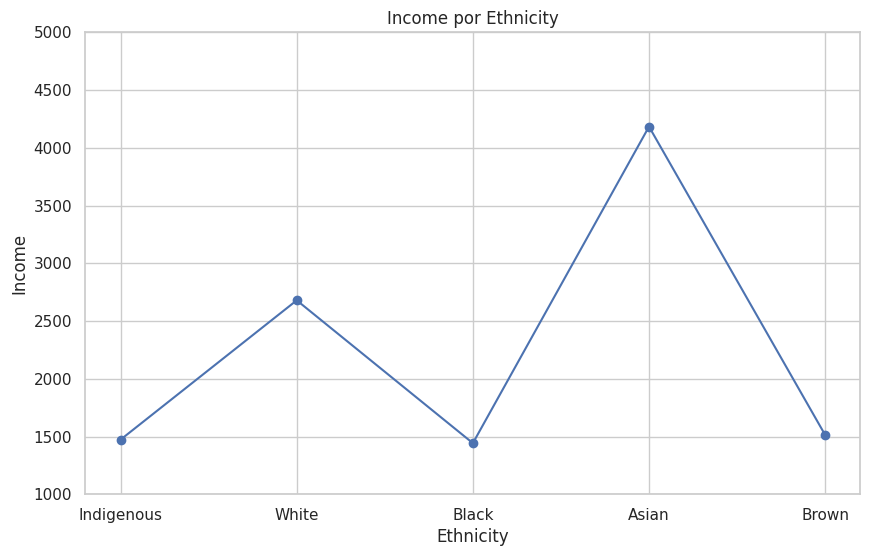

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')

plt.plot(normal_Income['Ethnicity'], normal_Income['Income'], marker='o', linestyle='-')

plt.xlabel('Ethnicity')
plt.ylabel('Income')
plt.title('Income por Ethnicity')
plt.yticks([1000,1500,2000,2500,3000,3500,4000,4500,5000])

plt.show()

In [ ]:
normal_Years_study = df.groupby(by='Ethnicity')['Years of Study'].median()
normal_Years_study = pd.DataFrame(normal_Years_study)
normal_Years_study.reset_index(inplace=True)

In [ ]:
normal_Years_study['Years of Study'] = normal_Years_study['Years of Study'].round(0)


In [ ]:
normal_Years_study.Ethnicity.replace({0:'Indigenous',2:'White',4:'Black',6:'Asian',8:'Brown'}, inplace=True)

In [ ]:
normal_Years_study

,Ethnicity,Years of Study
0,Indigenous,9.0
1,White,12.0
2,Black,9.0
3,Asian,13.0
4,Brown,9.0


With the **normal_Years_study** DataFrame, we can discern the temporal disparities on average while examining educational durations across ethnicities. Individuals of Caucasian and Asian descent spend an average of 12 and 13 years, respectively, in educational pursuits, whereas the remaining three ethnic groups exhibit an average study duration of 8 years.

***


Com o DataFrame **normal_Years_study**, podemos perceber as disparidades temporais na média ao examinar as durações educacionais entre as etnias. Indivíduos de ascendência caucasiana e asiática dedicam, em média, 12 e 13 anos, respectivamente, a empreendimentos educacionais, enquanto os três grupos étnicos restantes apresentam uma duração média de estudo de 8 anos.


# Comparison between: States

In [ ]:
df.columns

Index(['State', 'Gender', 'Age', 'Ethnicity', 'Years of Study', 'Income'], dtype='object')

In [ ]:
e = df.groupby(by='State')['Ethnicity'].value_counts()

In [ ]:
e = pd.DataFrame(e)

In [ ]:
e = e.rename(columns={'Ethnicity':'Ethnicity_count'})

In [ ]:
e

Ethnicity_count
State Ethnicity                 
11    8                      868
      2                      492
      4                      165
      6                        9
      0                        3
...                          ...
53    8                      944
      2                      861
      4                      233
      6                       12
      0                        4

[130 rows x 1 columns]

In [ ]:
normal_s = e.reset_index().pivot_table(index='State',
                                       columns = 'Ethnicity',
                                       values = 'Ethnicity_count',
                                       fill_value=0)

In [ ]:
normal_s.reset_index(inplace=True)

In [ ]:
normal_s.rename(columns={0:'Indigenous',2:'White',4:'Black',6:'Asian',8:'Brown'},inplace=True)

In [ ]:
normal_s

Ethnicity,State,Indigenous,White,Black,Asian,Brown
0,11,3,492,165,9,868
1,12,27,190,92,2,626
2,13,58,343,123,6,1676
3,14,20,96,61,1,362
4,15,44,790,466,14,3135
5,16,1,104,50,3,354
6,17,0,312,164,4,826
7,21,9,343,269,1,1165
8,22,1,233,151,0,826
9,23,14,879,186,12,2268


In [ ]:
a = df.groupby(by='State')['Income'].mean().round(2)
a = pd.DataFrame(a)
a.reset_index(inplace=True)

In [ ]:
a

,State,Income
0,11,1789.76
1,12,1506.09
2,13,1445.13
3,14,1783.59
4,15,1399.08
5,16,1861.35
6,17,1771.09
7,21,1019.43
8,22,1074.55
9,23,1255.40


In [ ]:
normal_s = pd.merge(normal_s, a, on = 'State', how = 'left')

In [ ]:
normal_s.State.replace({11:'Rondônia',
12:'Acre',
13:'Amazonas',
14:'Roraima',
15:'Pará',
16:'Amapá',
17:'Tocantins',
21:'Maranhão',
22:'Piauí',
23:'Ceará',
24:'Rio Grande do Norte',
25:'Paraíba',
26:'Pernambuco',
27:'Alagoas',
28:'Sergipe',
29:'Bahia',
31:'Minas Gerais',
32:'Espírito Santo',
33:'Rio de Janeiro',
35:'São Paulo',
41:'Paraná',
42:'Santa Catarina',
43:'Rio Grande do Sul',
50:'Mato Grosso do Sul',
51:'Mato Grosso',
52:'Goiás',
53:'Distrito Federal',},inplace=True)

In [ ]:
normal_s.sort_values(by='Income',ascending = False,inplace=True)

In [ ]:
normal_s.reset_index(inplace=True,drop=True)

In [ ]:
normal_s

,State,Indigenous,White,Black,Asian,Brown,Income
0,Distrito Federal,4,861,233,12,944,4241.95
1,São Paulo,27,5047,705,120,2645,2638.10
2,Rio de Janeiro,12,2488,927,19,2110,2496.40
3,Paraná,6,2966,193,53,1138,2493.87
4,Santa Catarina,5,1930,52,3,285,2470.85
5,Rio Grande do Sul,27,5083,444,9,759,2315.16
6,Mato Grosso do Sul,7,639,82,14,698,2262.60
7,Mato Grosso,6,614,168,8,1004,2130.65
8,Minas Gerais,16,3096,932,6,3636,2056.43
9,Espírito Santo,5,641,181,1,683,2026.38


In [ ]:
top_5 = normal_s.head().copy()
top_5 = pd.DataFrame(top_5)

In [ ]:
top_5

,State,Indigenous,White,Black,Asian,Brown,Income
0,Distrito Federal,4,861,233,12,944,4241.95
1,São Paulo,27,5047,705,120,2645,2638.10
2,Rio de Janeiro,12,2488,927,19,2110,2496.40
3,Paraná,6,2966,193,53,1138,2493.87
4,Santa Catarina,5,1930,52,3,285,2470.85



With the **top_5** DataFrame, we can make two observations. The first is that the states where household heads earn the most are in the South of the country, with the exception of the Federal District, which is the capital of Brazil. The second observation is that in these five states, the majority of household heads are white.
***
Com o DataFrame **top_5**, podemos fazer duas observações. A primeira é que os estados onde os chefes de residência recebem mais estão no Sul do país, com exceção do Distrito Federal, que é a capital do Brasil. A segunda observação é que, nesses cinco estados, a maioria dos chefes de residência são brancos.






In [ ]:
bottom_5 = normal_s.tail().copy()
bottom_5 = pd.DataFrame(bottom_5)

In [ ]:
bottom_5

,State,Indigenous,White,Black,Asian,Brown,Income
22,Ceará,14,879,186,12,2268,1255.40
23,Alagoas,4,246,103,0,550,1144.55
24,Sergipe,1,283,131,3,869,1109.11
25,Piauí,1,233,151,0,826,1074.55
26,Maranhão,9,343,269,1,1165,1019.43


With the **bottom_5** DataFrame, we can make two observations. The first is that the states where household heads earn less are in the Northeast of the country. The second observation is that, in these five states, the majority of household heads are brown.
***
Com o DataFrame **bottom_5**, podemos fazer duas observações. A primeira é que os estados onde os chefes de residência recebem menos estão no Nordeste do país. A segunda observação é que, nesses cinco estados, a maioria dos chefes de residência tem uma ascendência miscigenada.





